# Module 3 R Practice 2

In this notebook, we will do more practices of creating plots to explore data. 

### References for plotting in R


* **Reference** [ggplot documentation](https://ggplot2.tidyverse.org/reference/)
* **Reference** [R ggplot package](https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf)
* **Reference** [R ggplot cheatsheet](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf)
* **Reference** Nice ggplot examples: [example 1](https://www.bioss.ac.uk/people/helen/ggplot2Intro.html), [example 2](http://rstudio-pubs-static.s3.amazonaws.com/284329_c7e660636fec4a42a09eed968dc47f32.html)
* **Reference** [R color cheatsheet](http://www.guianaplants.stir.ac.uk/seminar/materials/colorPaletteCheatsheet.pdf)

---

In [1]:
library(ggplot2)

**Let's create some plots with the `iris` data set.** 

In [2]:
str(iris)
head(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


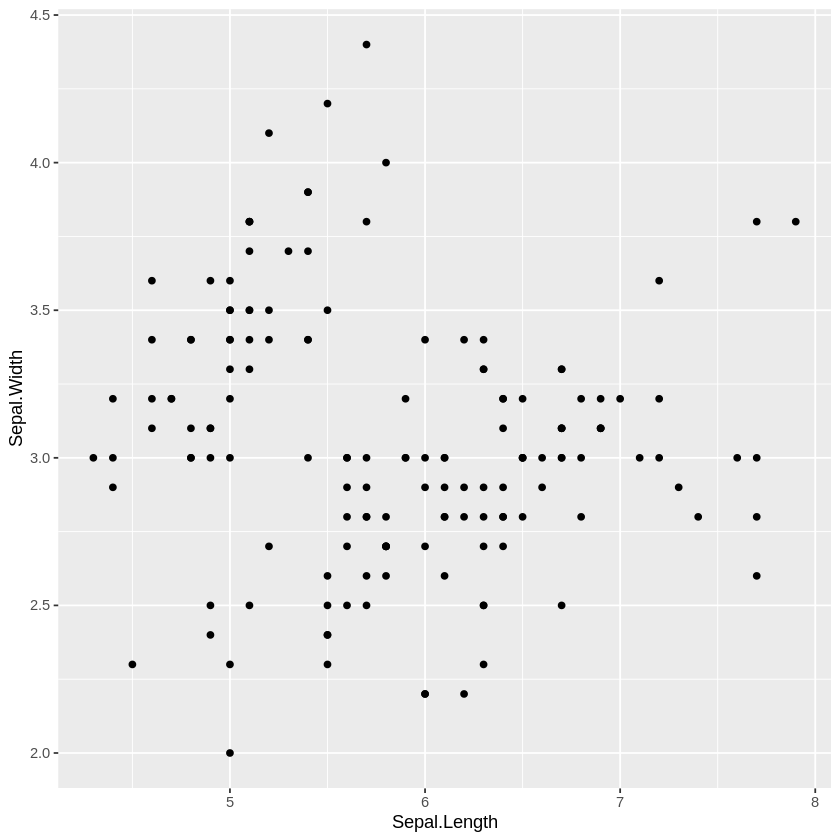

In [3]:
# start with a simple scatter plot: 

iris1 <- ggplot(data = iris, aes(x = Sepal.Length, y = Sepal.Width)) 
iris1 + geom_point()

**YOUR TURN: Add color and shape aesthetics to the geom_point() so that Species are visualized by both visual channels:**

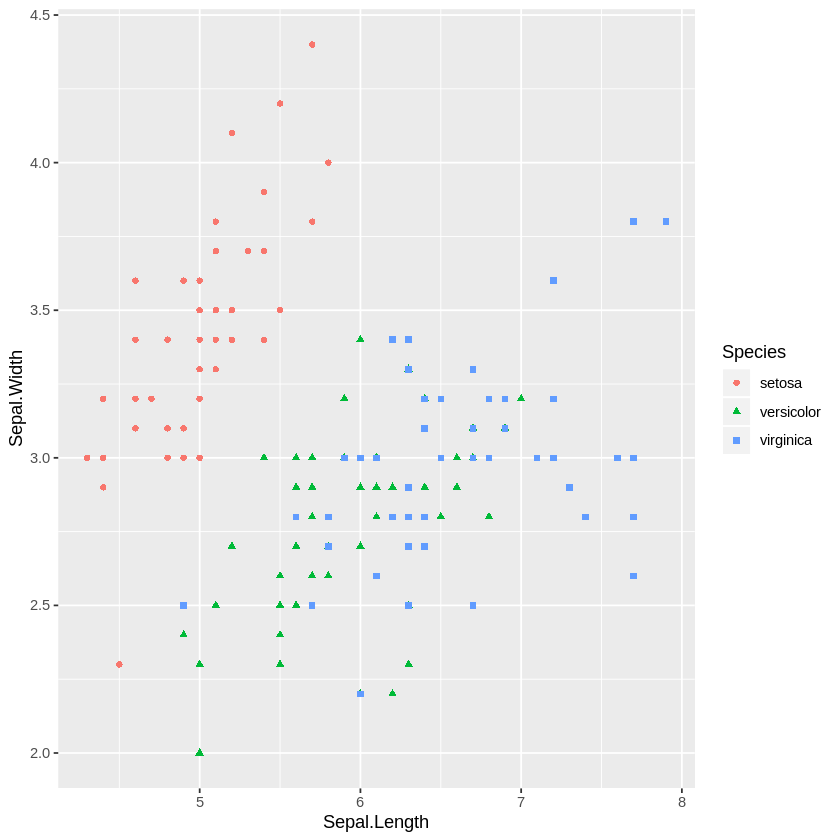

In [4]:
iris1 + geom_point(aes(color = Species, shape = Species))

**Let's make this plot nicer:** Let's add nice labels and make it visually more pleasing. We can also add lines to show the mean values. 

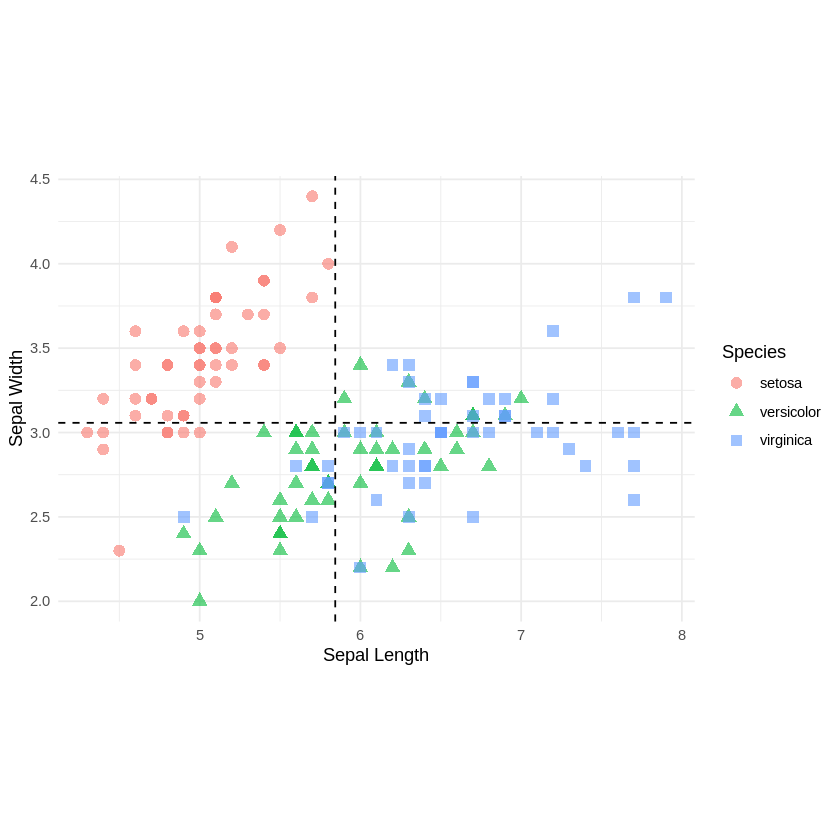

In [5]:
iris2 <- iris1 + geom_point(aes(color = Species, shape = Species), size = 3, alpha = 0.6) + 

                 geom_vline(aes(xintercept = mean(Sepal.Length)), color = "black", linetype = "dashed") +
                 geom_hline(aes(yintercept = mean(Sepal.Width)), color = "black", linetype = "dashed") +

                theme_minimal() + 
                labs(x = "Sepal Length", y = "Sepal Width") +
                theme(aspect.ratio = 0.7)
iris2

A scatter plot can show the distribution of data points for two dimensions (data atttributes). 



**Let's do a boxplot to see if attribute distributions are separable among the species.** Boxplots are good to visualize some descriptive statistics. 

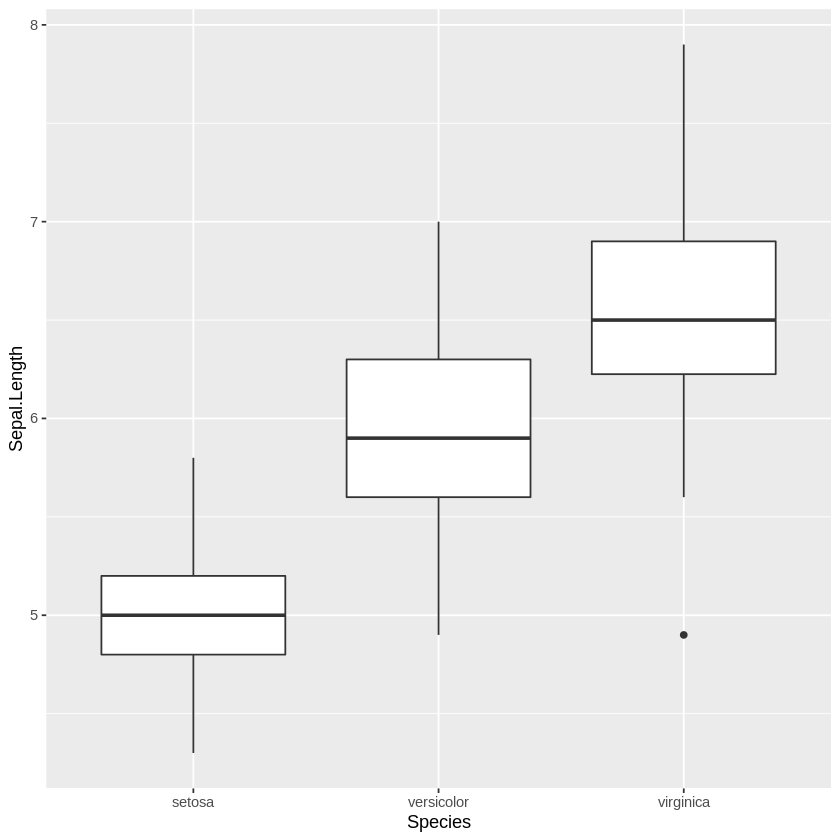

In [6]:
iris3 <- ggplot(data = iris, aes(x = Species, y = Sepal.Length)) + geom_boxplot()
iris3

### YOUR TURN: 
Create the boxplots for the remaining three attributes, add fill aesthetic to the boxplot to fill the boxes colored by the Species. Also, we will make the plots look nice.

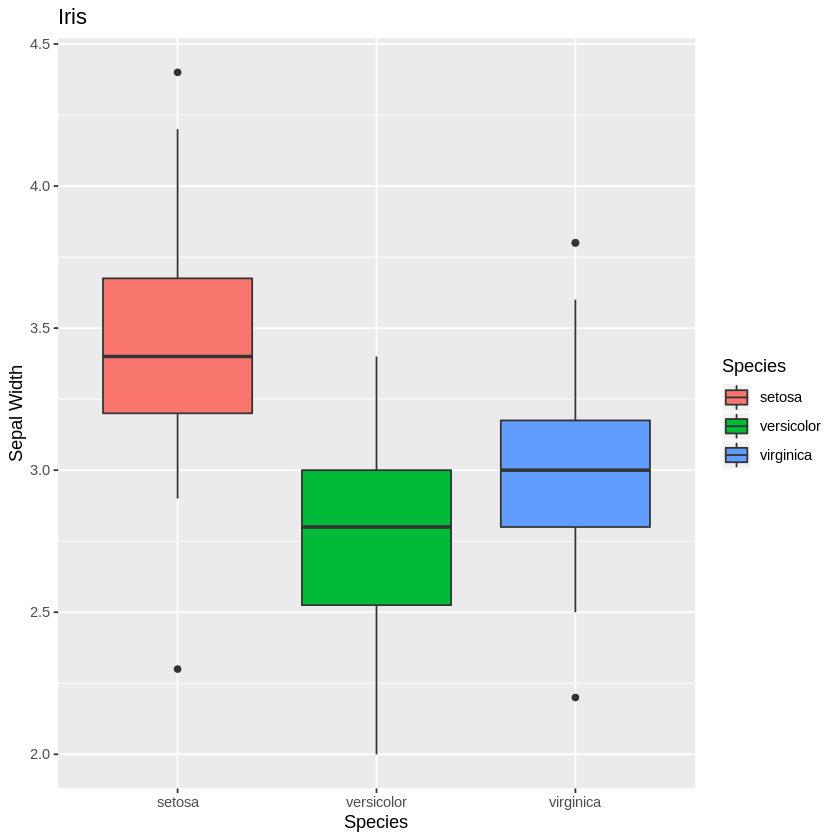

In [7]:

iris4 <- ggplot(data = iris, aes(x = Species, y = Sepal.Width)) + 
    geom_boxplot(aes(fill = Species)) +
    labs(title = "Iris", x = "Species", y = "Sepal Width")

iris4

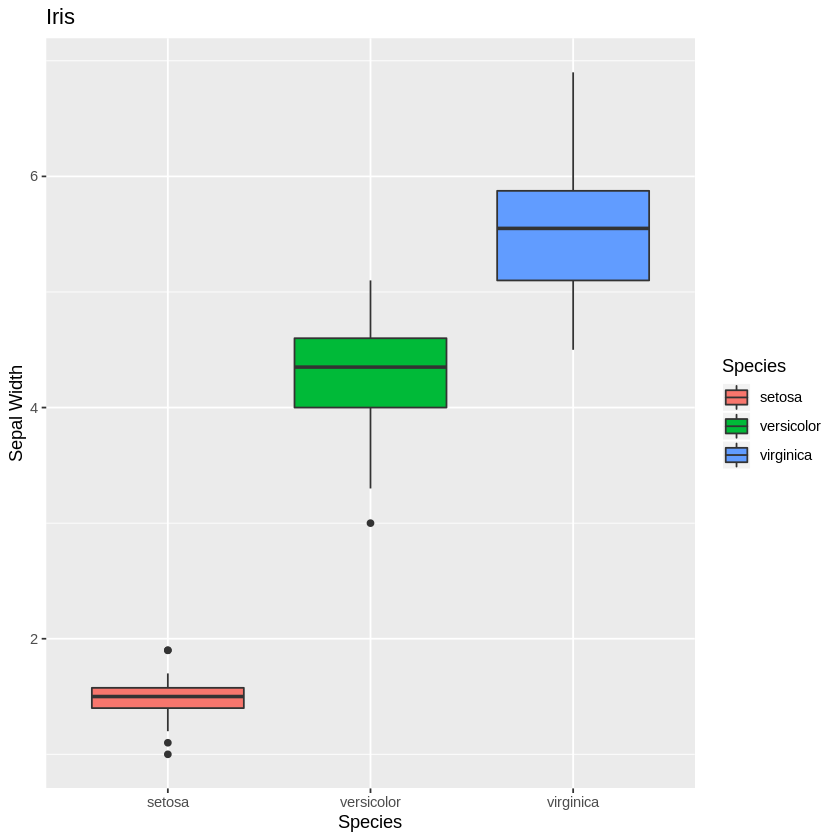

In [8]:

iris5 <- ggplot(data = iris, aes(x = Species, y = Petal.Length)) + 
    geom_boxplot(aes(fill = Species)) +
    labs(title = "Iris", x = "Species", y = "Sepal Width")

iris5

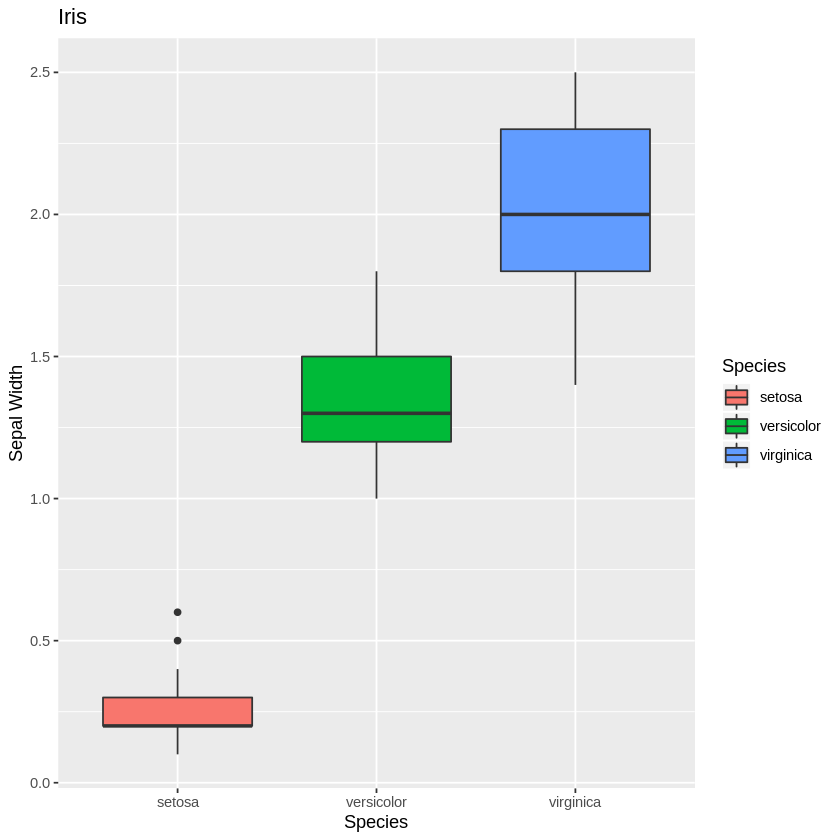

In [9]:

iris6 <- ggplot(data = iris, aes(x = Species, y = Petal.Width)) + 
    geom_boxplot(aes(fill = Species)) +
    labs(title = "Iris", x = "Species", y = "Sepal Width")

iris6

**Now, let's look at histograms:** Let's plot a histogram of Sepal.Width attribute. 

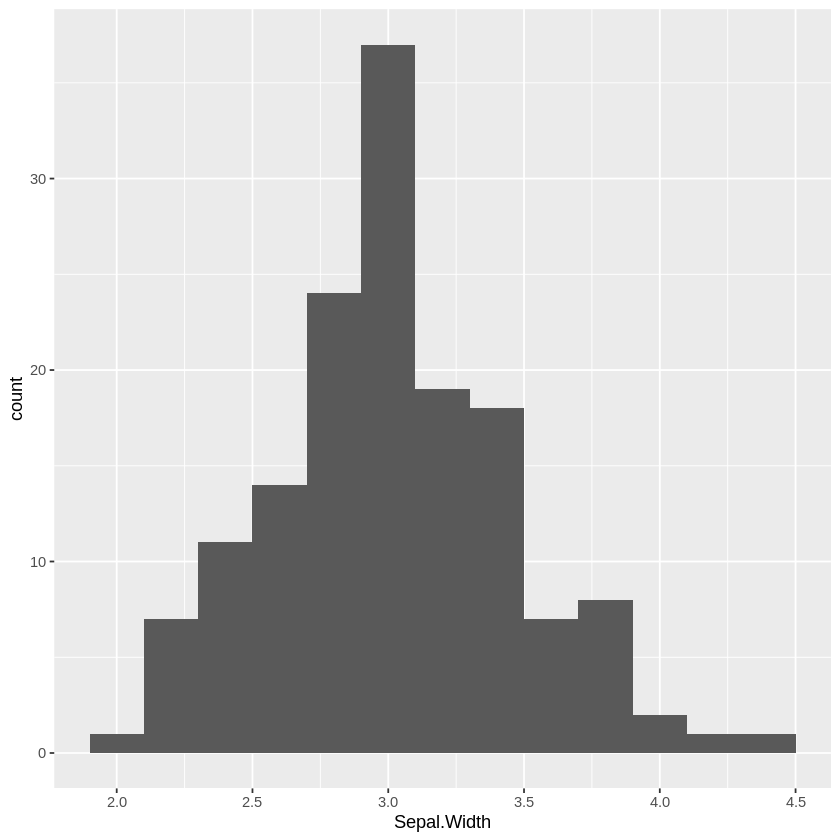

In [10]:
iris7 <-  ggplot(data = iris, aes(x = Sepal.Width)) + geom_histogram(binwidth = 0.2)
iris7

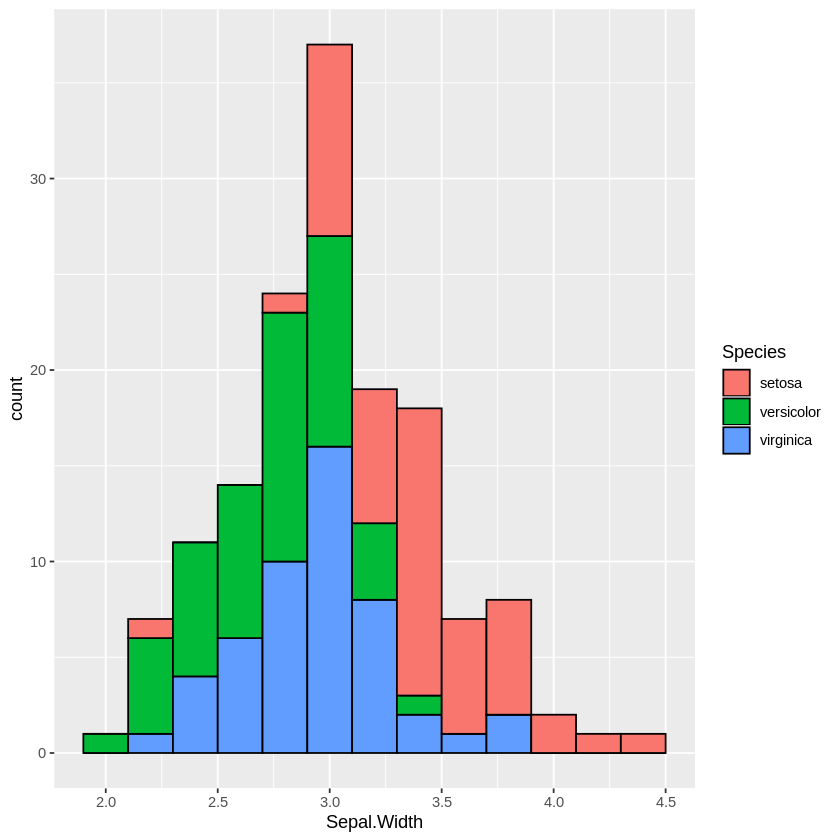

In [11]:
# We can also fill histograms by Species

iris7 <-  ggplot(data = iris, aes(x = Sepal.Width)) + geom_histogram(binwidth = 0.2, color = "black", aes(fill = Species))
iris7

The histogram above gives some idea about the species' sepal width distribution, but we can do better than this. 


**YOUR TURN: create histograms for the remaining three attributes, make them look nice.**


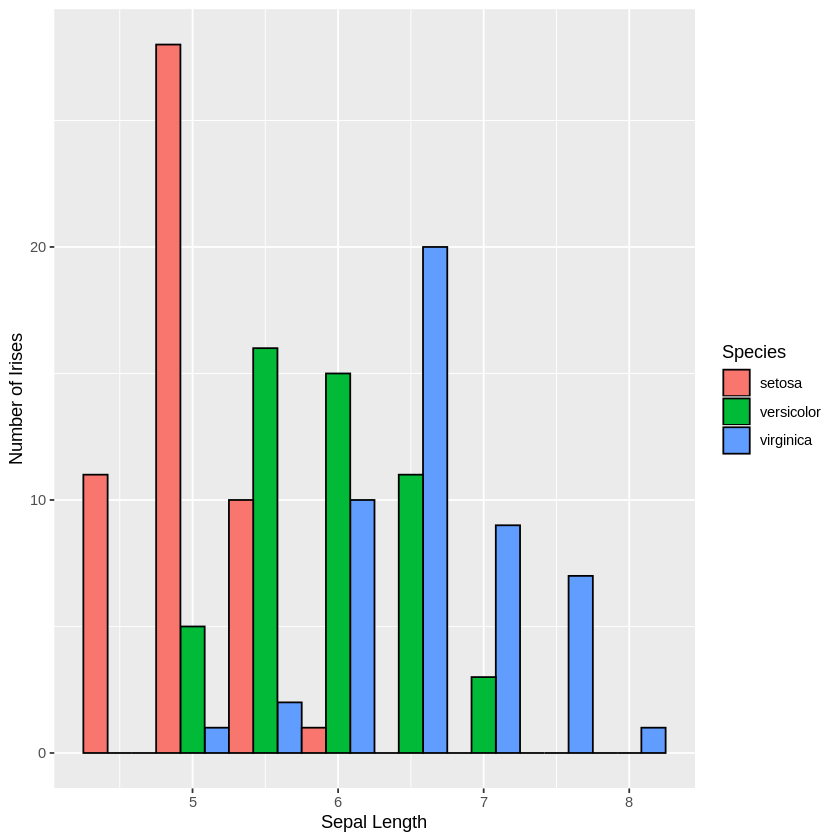

In [12]:
## YOUR CODE HERE 

iris8 <- ggplot(data = iris, aes(x = Sepal.Length)) + 
    geom_histogram(binwidth = 0.5, color = "black", aes(fill = Species), position = "dodge") +
    labs(x = "Sepal Length", y = "Number of Irises")
iris8


**We can add density plot on top of the histogram as we have seen in the first practice notebook.** It is a nicer visualization of distribution. 

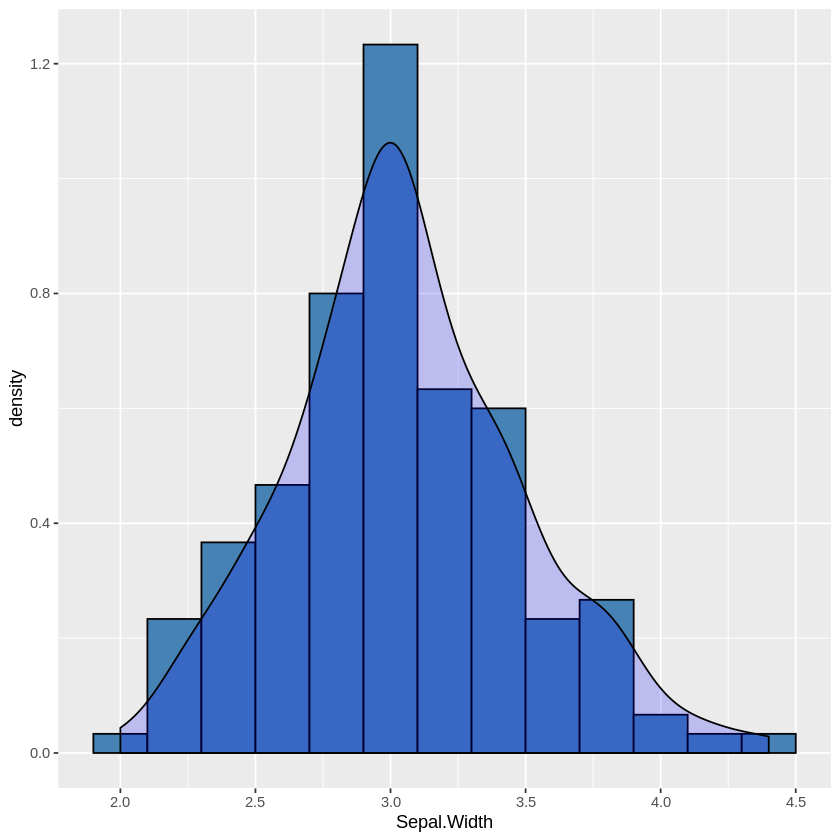

In [13]:
density <- ggplot(data = iris, aes(x = Sepal.Width))
density + geom_histogram(binwidth = 0.2, color = "black", fill = "steelblue", aes(y = ..density..)) +
  geom_density(alpha = 0.2,  fill = "blue") 

**We can also visualize per species, but it is getting CROWDED.** 

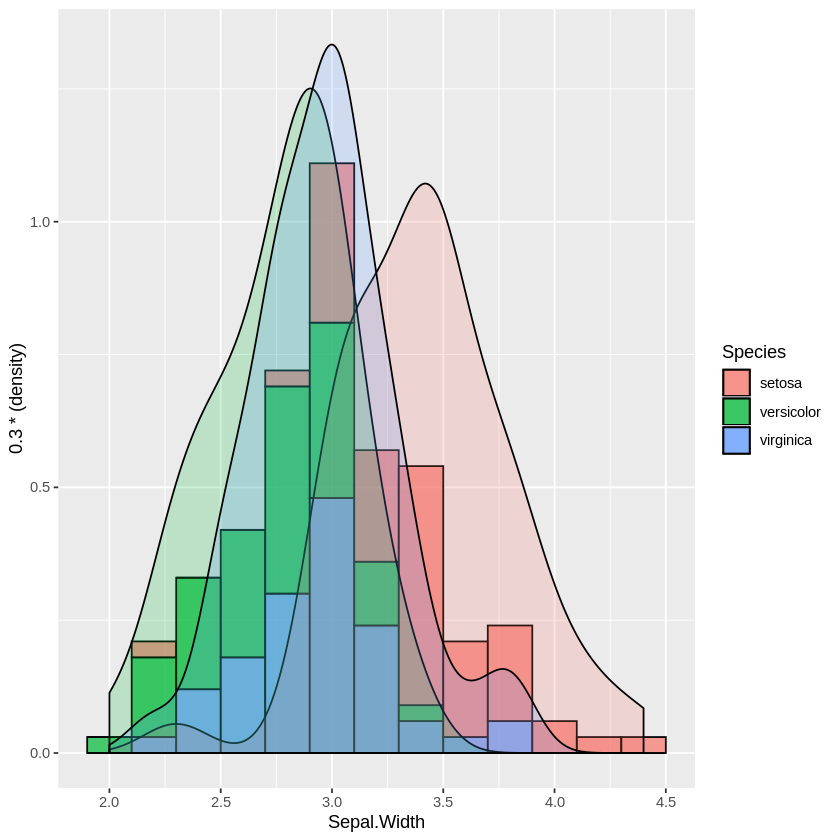

In [14]:
density <- ggplot(data = iris, aes(x = Sepal.Width, fill = Species))
density + geom_histogram(binwidth = 0.2, color = "black", aes(y = 0.3*(..density..)), alpha = 0.7) +
  geom_density(alpha = 0.2) 

**Let's do a density plot of the Sepal.Width attribute for all species:**

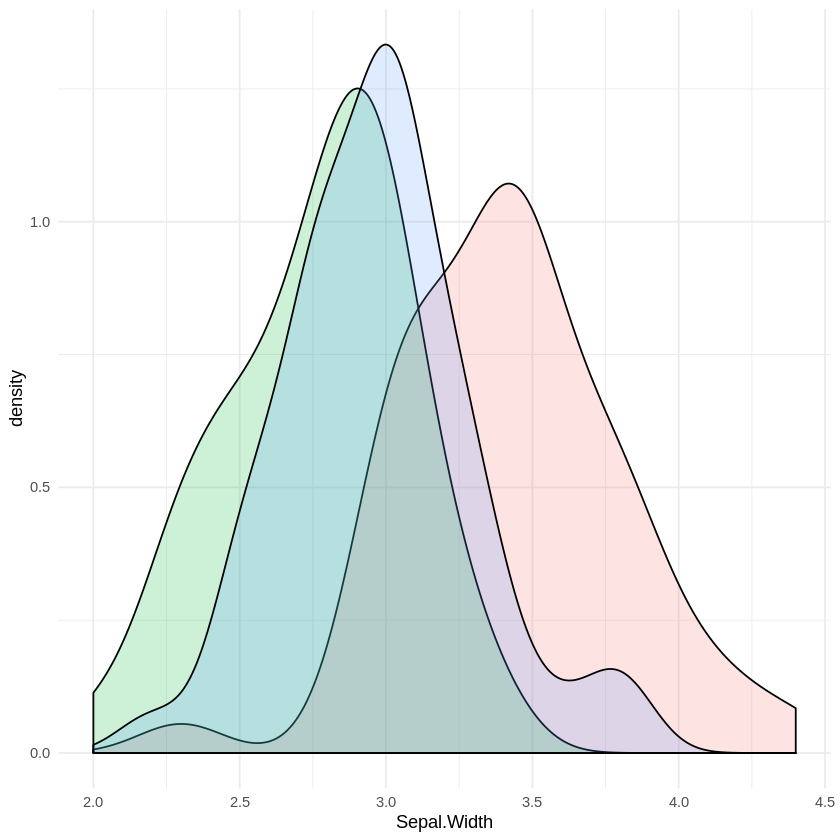

In [15]:
density2 <- ggplot(data = iris, aes(x = Sepal.Width, fill = Species)) +
            geom_density(alpha = 0.2) +
            theme_minimal() + 
            theme(legend.position = "none")
density2

This gives a better idea of the distributions. It seems like Sepal.Width is not a good attribute to separate the three species. 

---

### More Advanced Plots


We can add layers of plots in a ggplot object by adding new geom objects. The following plot shows both boxplot and scatter plot on the same graph. 

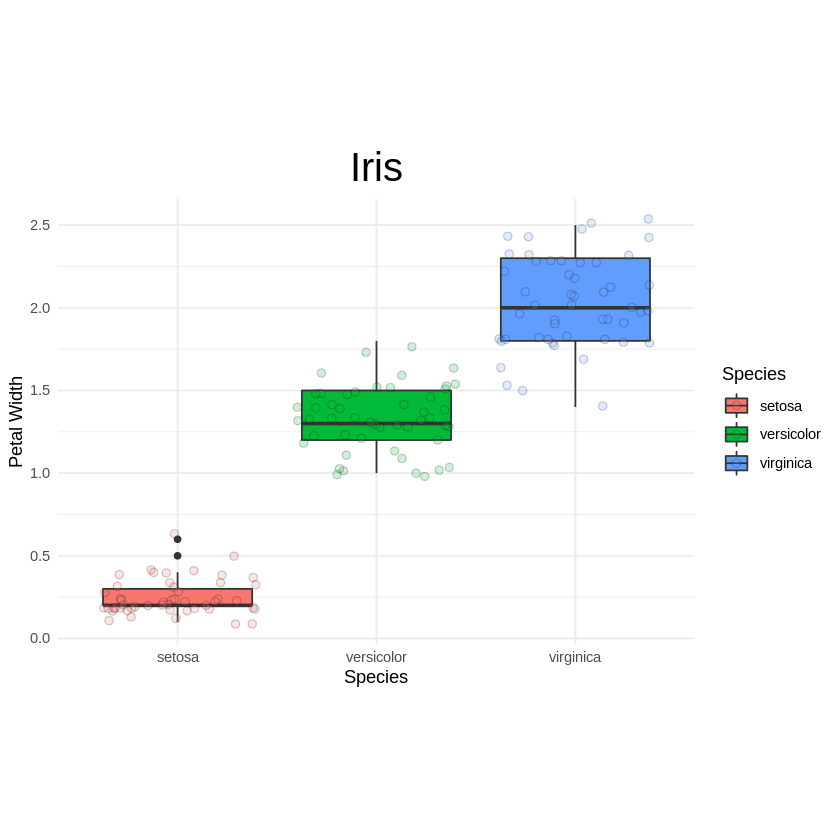

In [16]:
iris_j <- ggplot(data = iris, aes(x = Species, y = Petal.Width)) + geom_boxplot(aes(fill = Species)) + 
         geom_jitter(aes(fill = Species), color = "black", shape = 21, alpha = 0.2, size = 2) + 
         theme_minimal() + 
         labs(title = "Iris", x = "Species", y = "Petal Width") +
         theme(aspect.ratio = 0.7, plot.title = element_text(size =  24, hjust = 0.5))
iris_j

This is a nice way of visualizing some descriptive statistics and data points themselves. 


**YOUR TURN: The order of geoms matter:** swap jitter and boxplot to see how it will look like:  

In [17]:
iris_j <- ggplot(data = iris, aes(x = Species, y = Petal.Width)) + 
    geom_jitter(aes(fill = Species), color = "black", shape = 21, alpha = 0.2, size = 2) + 
    geom_boxplot(aes(fill = Species)) + 
    theme_minimal() + 
    labs(title = "Iris", x = "Species", y = "Petal Width") +
    theme(aspect.ratio = 0.7, plot.title = element_text(size =  24, hjust = 0.5))
iris_j

ERROR: Error in parse(text = x, srcfile = src): <text>:3:11: unexpected '<'
2:          
3:           <
             ^


**YOUR TURN: Now, create a density plot for the Sepal.Length attribute similar to `density2` plot above.**

In [ ]:
density3 <- ggplot(data = iris, aes(x = Sepal.Length, fill = Species)) +
            geom_density(alpha = 0.2) +
            theme_minimal() + 
            theme(legend.position = "none")
density3

**Now, we have three plots which we can arrange into a grid to show the distribution of data points.** 

First, we will modify `iris2` ggplot object:

In [ ]:
iris_t <- iris2 +  theme(legend.position = c(1,1),legend.justification = c(1,1)) 
iris_t

Then, we will flip `density2` object:

In [ ]:
density2_f <- density2 + coord_flip() 

To do a 2x2 grid with three plots, we need one "empty" plot: 

In [ ]:
# Empty plot
empty <- ggplot()+geom_point(aes(1,1), color = "white") +
theme(                              
plot.background = element_blank(), 
panel.grid.major = element_blank(), 
panel.grid.minor = element_blank(), 
panel.border = element_blank(), 
panel.background = element_blank(),
axis.title.x = element_blank(),
axis.title.y = element_blank(),
axis.text.x = element_blank(),
axis.text.y = element_blank(),
axis.ticks = element_blank()
)

**Now, we can arrange these three plots in a grid:

In [ ]:
library(gridExtra)

In [ ]:
grid.arrange(density3, empty, iris_t, density2_f, ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4))

## YOUR TURN:
**Create a similar plot like above for Petal.Width and Petal.Length.**

In [ ]:
# YOUR CODE HERE

# do the scatter plot first,

iris_petal_scatter <- ggplot(data = iris, aes(x = Petal.Length, y = Petal.Width)) +
                      geom_point(aes(color = Species, shape = Species), size = 3, alpha = 0.6) + 

                      geom_vline(aes(xintercept = mean(Petal.Length)), color = "black", linetype = "dashed") +
                      geom_hline(aes(yintercept = mean(Petal.Width)), color = "black", linetype = "dashed") +

                      theme_minimal() + 
                      labs(x = "Petal Length", y = "Petal Width") +
                      theme(aspect.ratio = 0.7)

iris_petal_scatter

In [ ]:
# then, the two density plots, 

density_petal_length <- ggplot(data = iris, aes(x = Petal.Length, fill = Species)) +
                        geom_density(stat = "density", alpha = 0.2) +
                        theme_minimal() +
                        theme(legend.position = "none")
density_petal_length

density_petal_width <- ggplot(data = iris, aes(x = Petal.Width, fill = Species)) +
                        geom_density(stat = "density", alpha = 0.2) +
                        theme_minimal() +
                        theme(legend.position = "none") + 
                        coord_flip()
density_petal_width

density3 <- ggplot(data = iris, aes(x = Sepal.Length, fill = Species)) +
            geom_density(alpha = 0.2) +
            theme_minimal() + 
            theme(legend.position = "none")
density3


In [ ]:
# then, use the same empty plot and arrange them to a grid. 
grid.arrange(density_petal_length, empty, iris_petal_scatter, density_petal_width, ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4))

### Which species can be easily separated from the others? 